In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt

In [42]:
# Load edlich data and print head
data = pd.read_csv("edlich-kmeans-A0.csv") 
data.head()

,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216


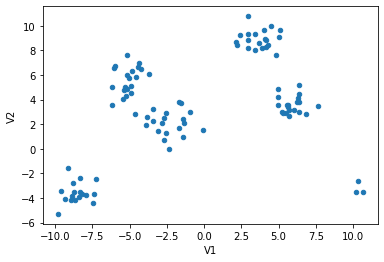

In [43]:
# Print scatterplot to visualize dataset. As result we observe 6 clusters; k = 6 
ax = data.plot.scatter(x="V1", y="V2")

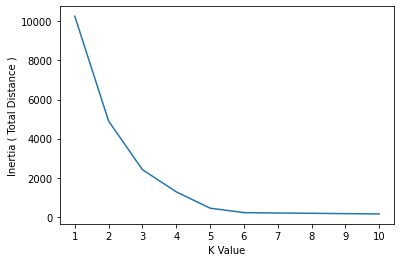

In [44]:
# Apply elbow method on dataset and print visualization to verify observation of k = 6
X = data
def cluster_variance(n):
    variances = []
    kmeans = []
    outputs = []
    K = [i for i in range(1, n + 1)]    
    for i in range(1, n + 1):
        variance = 0
        model = KMeans(n_clusters = i, random_state = 82, verbose = 0).fit(X)
        kmeans.append(model)
        variances.append(model.inertia_)
    return variances,K,n

variances,K,n = cluster_variance(10)

plt.plot(K,variances)
plt.ylabel("Inertia ( Total Distance )")
plt.xlabel("K Value")
plt.xticks([i for i in range(1,n+1)])
plt.show()

As result of dataset visualization and apliance of elbow method we find out that best k is 6

In [45]:
# Apply KMeans on dataset with k = 6

In [46]:
kmeans = KMeans(n_clusters=6)
kmeans = kmeans.fit(data)
# C = coordinates of centers
C = kmeans.cluster_centers_

In [47]:
# Add cluster to points in dataset and print result
data['cluster'] = kmeans.labels_
print(data)

          V1         V2         V3  cluster
0  -5.340236   4.747246   3.823326        0
1  -9.587065  -3.434466   9.701839        3
2  -8.385012  -3.902794   8.514620        3
3   5.708226   2.658575   5.404482        1
4  -7.431665  -4.390251   9.003216        3
..       ...        ...        ...      ...
95  5.240474   2.983800   5.104915        1
96 -1.675543   3.780111  -8.060940        4
97  2.979751  10.772783 -10.093143        2
98 -5.154519   5.976515   2.794622        0
99 -4.878509   5.096635   5.659783        0

[100 rows x 4 columns]
